In [29]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk
from skimage import io 
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

In [30]:
# From https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

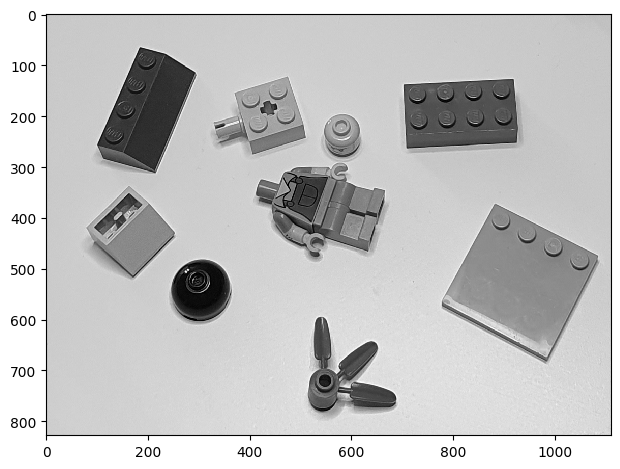

In [62]:
# Directory containing data and images
in_dir = "data/"
im_name = "lego_5.png"
im_org = rgb2gray(io.imread(in_dir + im_name))
im7 = rgb2gray(io.imread(in_dir + 'lego_7.png'))
im3 = rgb2gray(io.imread(in_dir + 'lego_3.png'))
io.imshow(im3)

### Exercise 1

We will start by computing a binary image from the lego image:

- Read the image into **im_org**.
- Convert the image to gray scale. 
- Find a threshold using *Otsu's method*.
- Apply the treshold and generate a binary image **bin_img**.
- Visualize the image using `plot_comparison(im_org, bin_img, 'Binary image')`

As ncan be seen, the lego brick is not *segmented* perfectly. There are holes in the segmentation. Let us see if what we can do.


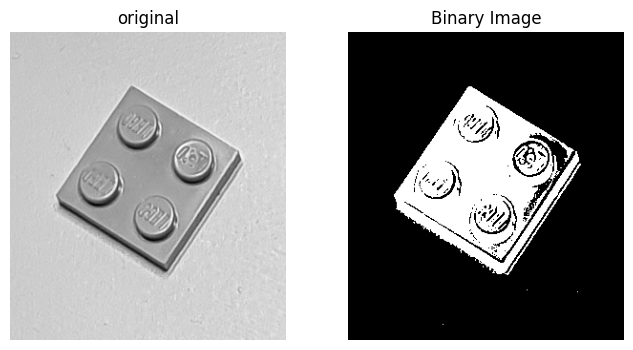

In [32]:
thresh = threshold_otsu(im_org)
bin_img = im_org < thresh
plot_comparison(im_org, bin_img, 'Binary Image')

### Exercise 2
We will start by creating a structuring element. In scikit-image they are called footprint. A disk shaped footprint can be created by:

In [33]:
footprint = disk(5)
# Check the size and shape of the structuring element
print(footprint)

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


### Erosion

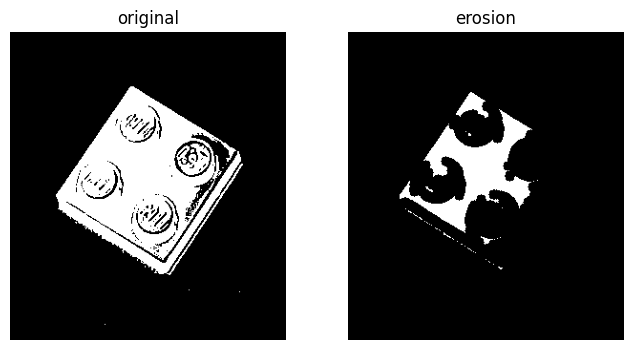

In [34]:
eroded = erosion(bin_img, footprint)
plot_comparison(bin_img, eroded, 'erosion')

### Dilation

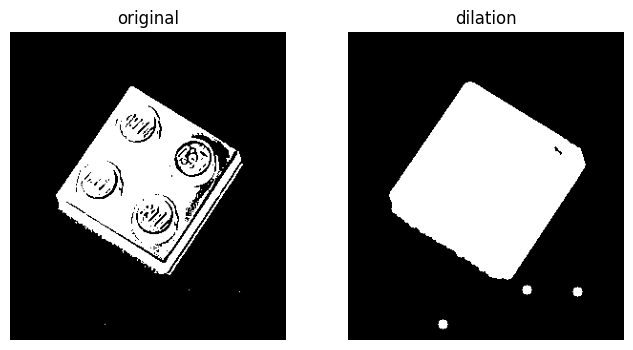

In [35]:
dilated = dilation(bin_img, footprint)
plot_comparison(bin_img, dilated, 'dilation')

In [60]:
def compute_outline(bin_img):
    """
    Computes the outline of a binary image
    """
    footprint = disk(3)
    dilated = dilation(bin_img, footprint)
    outline = np.logical_xor(dilated, bin_img)
    return outline

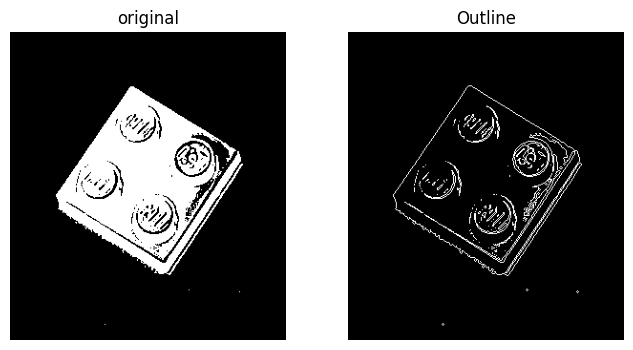

In [44]:
im_outline = compute_outline(bin_img)
plot_comparison(bin_img, im_outline, 'Outline')

### Exercise 7

Try the following:

- Do an *opening* with a disk of size 1 on the binary lego image.
- Do a *closing* with a disk of size 15 on the result of the opening.
- Compute the outline and visualize it.

What do you observe and why does the result look like that?
Only the larger outline of the lego piece is visible, this is because the closing of the image with a large kernel filled holes inside the shape.

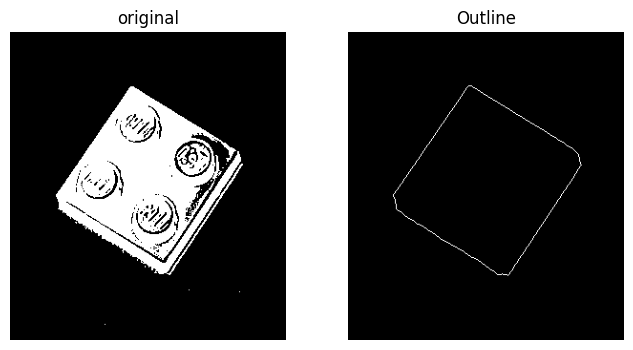

In [46]:
im_open = opening(bin_img, disk(1))
im_close = closing(im_open, disk(15))
outline = compute_outline(im_close)
plot_comparison(bin_img, outline, 'Outline')

### Exercise 8

Start by:
- reading the **lego_7.png** image and convert it to gray scale.
- Compute a treshold using *Otsu's method* and apply it to the image.
- Show the binary image together with the original.
- Compute the outline of the binary image and show it with the binary image.

What do you observe?

The output of the outlining function differs between objects as their intensities are not consistent

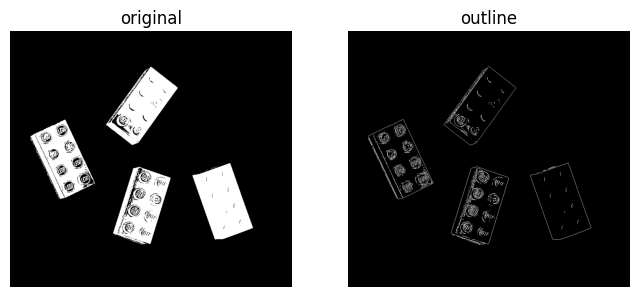

In [51]:
thresh0 = threshold_otsu(im7)
bin_img0 = im7 < thresh0

outline0 = compute_outline(bin_img0)
plot_comparison(bin_img0, outline0, 'outline')

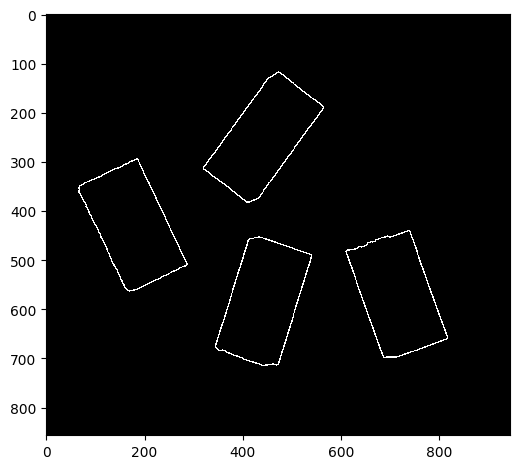

In [61]:
im_close0 = closing(bin_img0, disk(8))
outline1 = compute_outline(im_close0)
io.imshow(outline1)

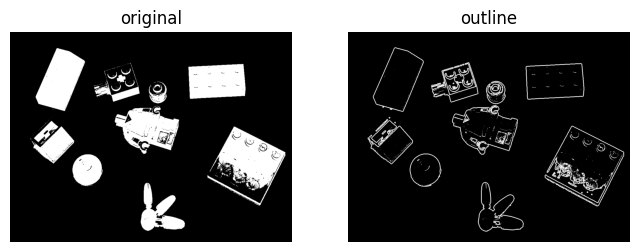

In [63]:
thresh1 = threshold_otsu(im3)
bin_img1 = im3 < thresh0

outline2 = compute_outline(bin_img1)
plot_comparison(bin_img1, outline2, 'outline')

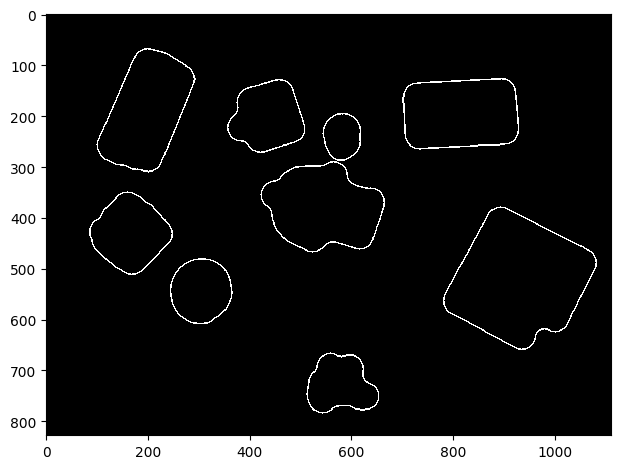

In [71]:
im_close1 = closing(bin_img1, disk(20))
im_open0 = opening(im_close1, disk(25))
outline3 = compute_outline(im_open0)
io.imshow(outline3)

### Exercise 10
Try the above on the lego_3.png image. What do you observe?

When objects are closer together, the aggressive closing operation required to fill holes inside objects also merge objects together. If the outlines need to reflect the shapes of the original objects, this can cause problems.